In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
sales=pd.read_csv("C:\\Users\Pro\Downloads\sales-cars.csv", parse_dates=['Month'],index_col=['Month'])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Sales    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [43]:
sales.describe()

,Sales
count,36.00000
mean,295.75000
std,117.81908
min,119.00000
25%,192.50000
50%,280.00000
75%,402.75000
max,520.00000


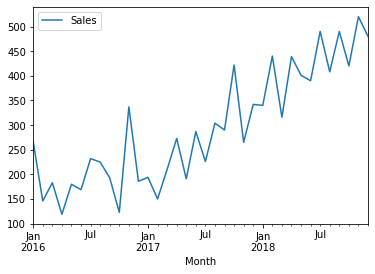

In [5]:

sales.plot()

we notice that there is no stationarity i.e. mean, variance and covariance is not constant or stable over periods of time intervals.
mean in Jan 2016 till 2017 will be around 200 but mean in jan 2018 t0 2019 is around 400

In [6]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [7]:
# converting the data into stationarity
sales_diff=sales.diff(periods=1)  # integrated order of 1 difference.  it is the I in ARIMA model
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


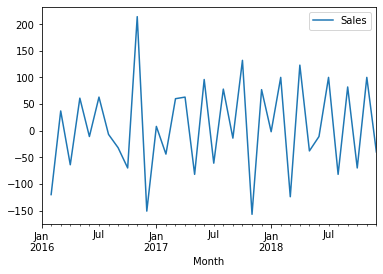

In [8]:
sales_diff.plot()

***we can notice there is no trend in the data now after doing stationrity i.e differencing

In [9]:
# manually spliting the data
X=sales.values  # we have only one variable i.e univariate
train=X[0:27] # total 36 observations, 27 taken as training set
test=X[27:]
predictions=[]

train.shape
test.shape # remaing 9 observations are test set

(9, 1)

# AUTO REGRESSION AR MODEL

In [10]:
# AUTO REGRESSION AR MODEL
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train) # training the model in AR
ar_pred=model_ar.fit()

In [11]:
predictions=ar_pred.predict(start=27, end=35)
predictions

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544])

In [12]:
#Now compare the actual output values for test with the predicted values
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

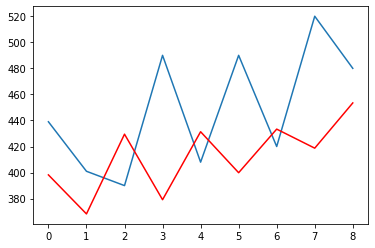

In [13]:
# ploting the 9 test observations of ar model
plt.plot(test)
plt.plot(predictions, color='red')

*** red plot is after doing integration or difference by 1 order

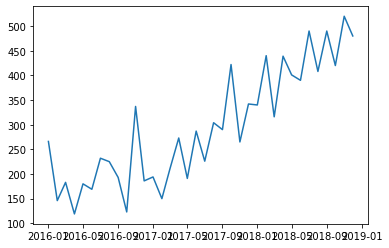

In [14]:
# comparision with original data
plt.plot(sales)

this is the original graph, last three spikes are testing set

In [15]:
mean_squared_error(test,predictions)

4041.3105555505254

# ARIMA Model

1) Choosing the differencing order

In [44]:
#p,d,q (p = periods in AR, d= difference, q=error lags in moving average) we have pass this parameter for ARIMA Model(0,0,0)
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.log(sales).dropna(), (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(np.log(sales).dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(0, 0)   Log Likelihood                 -19.380
Method:                           css   S.D. of innovations              0.415
Date:                Fri, 29 Nov 2019   AIC                             42.760
Time:                        09:58:37   BIC                             45.927
Sample:                    01-01-2016   HQIC                            43.865
                         - 12-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6072      0.069     81.160      0.000       5.472       5.743
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observat

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The Akaike Information Criterion (AIC) is lower with the ARIMA(0,1,0), meaning this model is performing better than the ARIMA(0,0,0). Let’s have a look at the residuals and check their variance:

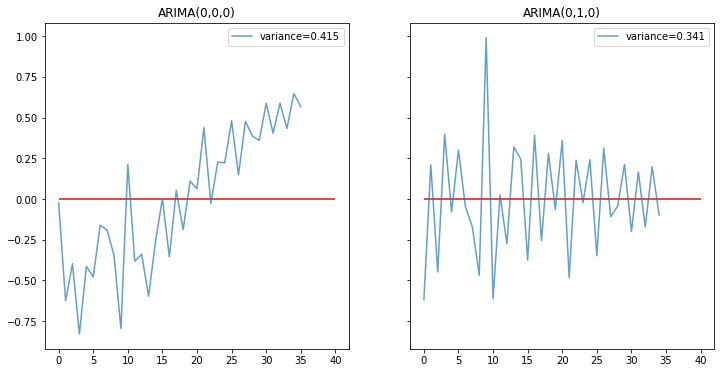

In [21]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=40, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=40, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();

2) Choosing the MA order
Now we know we have to include a 1st order difference in our model, we need to choose the Moving-Average order. This is done by looking at the differenced series (because we just saw that the first-order difference series was stationary). Again, we look at our ACF and PACF plots, with this rule in mind:
“ If the lag-1 autocorrelation of the differenced series ACF is negative, and/or there is a sharp cutoff, then choose a MA order of 1”.

In [46]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.log(sales).dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_000.summary())

model = ARIMA(np.log(sales).dropna(), (0, 1, 1))
res_011 = model.fit()
print(res_010.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(0, 0)   Log Likelihood                 -19.380
Method:                           css   S.D. of innovations              0.415
Date:                Fri, 29 Nov 2019   AIC                             42.760
Time:                        09:59:21   BIC                             45.927
Sample:                    01-01-2016   HQIC                            43.865
                         - 12-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6072      0.069     81.160      0.000       5.472       5.743
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observat

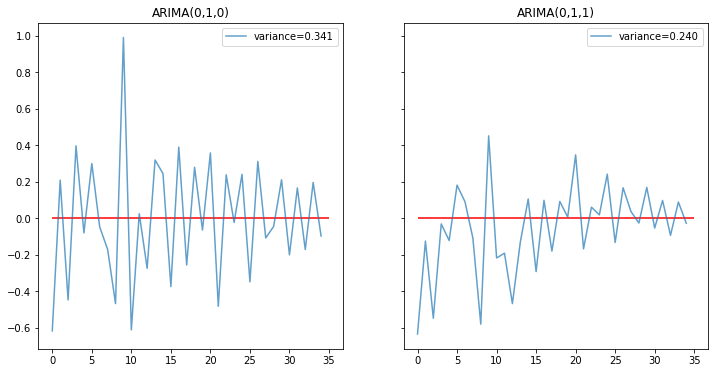

In [47]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[0].hlines(0, xmin=0, xmax=35, color='r');
ax[0].set_title("ARIMA(0,1,0)");
ax[0].legend();
ax[1].plot(res_011.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_011.resid.values)));
ax[1].hlines(0, xmin=0, xmax=35, color='r');
ax[1].set_title("ARIMA(0,1,1)");
ax[1].legend();

3) Choosing the AR order

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.log(sales).dropna(), (0, 1, 1))
res_011 = model.fit()
print(res_011.summary())

model = ARIMA(np.log(sales).dropna(), (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(0, 1, 1)   Log Likelihood                   1.245
Method:                       css-mle   S.D. of innovations              0.222
Date:                Fri, 29 Nov 2019   AIC                              3.511
Time:                        10:03:06   BIC                              8.177
Sample:                    02-01-2016   HQIC                             5.122
                         - 12-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0339      0.004      9.522      0.000       0.027       0.041
ma.L1.D.Sales    -0.9999      0.100    -10.047      0.000      -1.195      -0.805
                                    Root

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   2.677
Method:                       css-mle   S.D. of innovations              0.211
Date:                Fri, 29 Nov 2019   AIC                              2.646
Time:                        10:03:07   BIC                              8.867
Sample:                    02-01-2016   HQIC                             4.793
                         - 12-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0346      0.003     13.063      0.000       0.029       0.040
ar.L1.D.Sales    -0.3136      0.179     -1.751      0.089      -0.664       0.037
ma.L1.D.Sales    -1.0000      0.154     

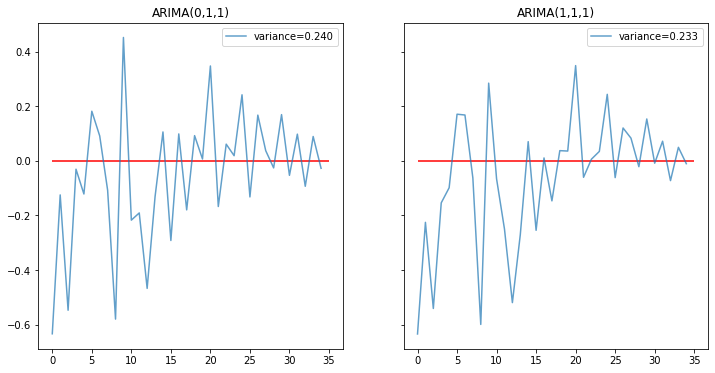

In [49]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_011.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_011.resid.values)));
ax[0].hlines(0, xmin=0, xmax=35, color='r');
ax[0].set_title("ARIMA(0,1,1)");
ax[0].legend();
ax[1].plot(res_111.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_111.resid.values)));
ax[1].hlines(0, xmin=0, xmax=35, color='r');
ax[1].set_title("ARIMA(1,1,1)");
ax[1].legend();

Here is what we get by fitting a (1,1,1) ARIMA

Autocorrelation plots (ACF & PACF)
An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.
Ideally, we want no correlation between the series and lags of itself.